In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corpus-war-dataset/corpus_date (3).pkl
/kaggle/input/corpus-pkl/corpus.pkl


In [8]:
import pickle

# Load the preprocessed data from the pickle file
with open('/kaggle/input/corpus-war-dataset/corpus_date (3).pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
data

,content,date
0,is that the same expensive and ineffective bor...,2022-03-05
1,so the americans are dressing up as russ...,2022-03-05
2,maybe if one military unit from ukraine crosse...,2022-03-05
3,volunteers cross polish border into ukraine to...,2022-03-05
4,but theres no russian aircraft flying nea...,2022-03-05
...,...,...
284659,rusia wants to take back ukraine they are our...,2021-12-31
284660,a positive for russia is that according to us...,2021-12-31
284661,resists further invades because already ...,2021-12-31
284662,i fully support ukraine s sovereignty but...,2021-12-31


In [10]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)

In [12]:
data

,content,date,polarity,subjectivity
0,is that the same expensive and ineffective bor...,2022-03-05,-0.187500,0.268750
1,so the americans are dressing up as russ...,2022-03-05,0.000000,0.000000
2,maybe if one military unit from ukraine crosse...,2022-03-05,-0.050000,0.050000
3,volunteers cross polish border into ukraine to...,2022-03-05,0.000000,0.000000
4,but theres no russian aircraft flying nea...,2022-03-05,0.200000,0.300000
...,...,...,...,...
284659,rusia wants to take back ukraine they are our...,2021-12-31,0.040000,0.260000
284660,a positive for russia is that according to us...,2021-12-31,0.151515,0.530303
284661,resists further invades because already ...,2021-12-31,0.000000,0.500000
284662,i fully support ukraine s sovereignty but...,2021-12-31,-0.700000,0.900000


Text(0, 0.5, '<--Facts-------Opinions--->')

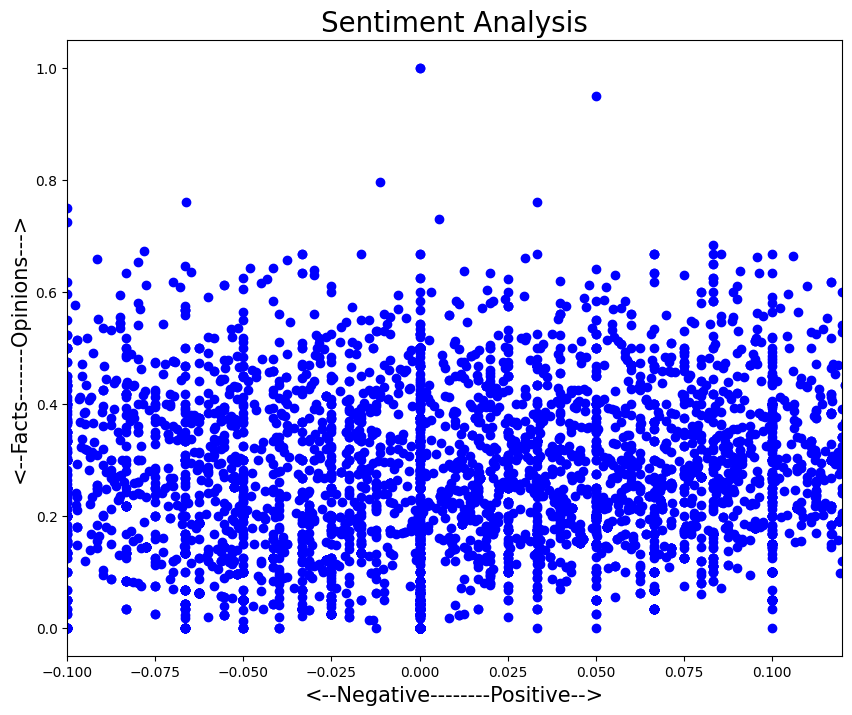

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,8]
data_subset=data[:10000]
for index , review in enumerate(data_subset.index):
    x=data_subset.polarity.loc[review]
    y=data_subset.subjectivity.loc[review]
    plt.scatter(x,y,color='blue')
    plt.xlim(-0.1,.12)
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('<--Negative--------Positive-->',fontsize=15)
plt.ylabel('<--Facts-------Opinions--->',fontsize=15)

In [13]:
# Classify tweets as positive, negative, or neutral based on polarity values
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
       return 'Negative'
    else:
       return 'Neutral'

#Apply the classification function to the 'polarity' column
data['sentiment'] = data['polarity'].apply(classify_sentiment)

#Display the count of tweets in each sentiment category
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)


sentiment
Neutral     151915
Positive     72358
Negative     48209
Name: count, dtype: int64


In [14]:
data

,content,date,polarity,subjectivity,sentiment
0,is that the same expensive and ineffective bor...,2022-03-05,-0.187500,0.268750,Negative
1,so the americans are dressing up as russ...,2022-03-05,0.000000,0.000000,Neutral
2,maybe if one military unit from ukraine crosse...,2022-03-05,-0.050000,0.050000,Neutral
3,volunteers cross polish border into ukraine to...,2022-03-05,0.000000,0.000000,Neutral
4,but theres no russian aircraft flying nea...,2022-03-05,0.200000,0.300000,Positive
...,...,...,...,...,...
284659,rusia wants to take back ukraine they are our...,2021-12-31,0.040000,0.260000,Neutral
284660,a positive for russia is that according to us...,2021-12-31,0.151515,0.530303,Positive
284661,resists further invades because already ...,2021-12-31,0.000000,0.500000,Neutral
284662,i fully support ukraine s sovereignty but...,2021-12-31,-0.700000,0.900000,Negative


In [15]:
sorted_date=data
sorted_date=sorted_date.sort_values(by='date')

In [16]:
sorted_date

,content,date,polarity,subjectivity,sentiment
284663,biden warns putin what does acting decisivel...,2021-12-31,-0.104167,0.270833,Negative
284203,are we sleepwalking into thermonuclear world w...,2021-12-31,0.475000,0.833333,Positive
284202,the seeds of a major global conflict will be s...,2021-12-31,0.123958,0.333333,Positive
284201,the extra pentagon money is for the war abou...,2021-12-31,0.000000,0.100000,Neutral
284200,a recent report by the institute for the study...,2021-12-31,-0.050000,0.175000,Neutral
...,...,...,...,...,...
56354,putin orders russian authorities to compile a ...,2022-03-05,0.000000,0.200000,Neutral
56355,i don t support the war amp people dying...,2022-03-05,0.000000,0.000000,Neutral
56356,us are always diplomatic in this kind of ...,2022-03-05,0.433333,0.500000,Positive
56358,the punch line of ukraine is the audacity of...,2022-03-05,-0.392460,0.484425,Negative


**PLOT FOR ALL THE DATES**

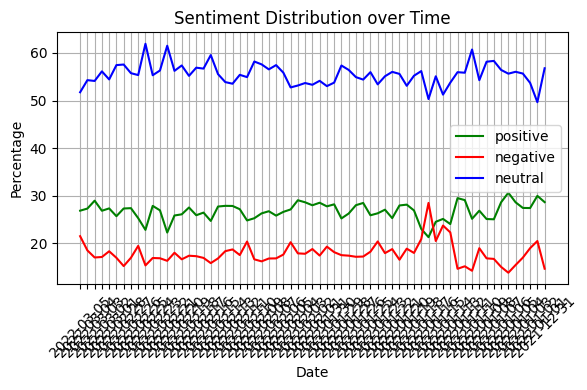

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sentiment_over_time_without_split(data, figsize=(6, 4)):
    # Initialize lists to store sentiment percentages for all dates
    pos_list = []
    neg_list = []
    neu_list = []

    # Iterate over each unique date
    unique_dates = data["date"].unique()
    for date in unique_dates:
        temp = data[data["date"] == date]
        pos_temp = temp[temp["sentiment"] == "Positive"]
        neg_temp = temp[temp["sentiment"] == "Negative"]
        neu_temp = temp[temp["sentiment"] == "Neutral"]

        pos_percentage = (pos_temp.shape[0] / temp.shape[0]) * 100 if temp.shape[0] != 0 else 0
        neg_percentage = (neg_temp.shape[0] / temp.shape[0]) * 100 if temp.shape[0] != 0 else 0
        neu_percentage = (neu_temp.shape[0] / temp.shape[0]) * 100 if temp.shape[0] != 0 else 0

        pos_list.append(pos_percentage)
        neg_list.append(neg_percentage)
        neu_list.append(neu_percentage)

    # Plotting
    plt.figure(figsize=figsize)
    plt.plot(unique_dates, pos_list, label="positive", color="green")
    plt.plot(unique_dates, neg_list, label="negative", color="red")
    plt.plot(unique_dates, neu_list, label="neutral", color="blue")

    # Customize plot appearance
    plt.title("Sentiment Distribution over Time")
    plt.xlabel("Date")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_sentiment_over_time_without_split(data, figsize=(6, 4))


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sentiment_over_time_subset(data, subset_size):
    # Split dates into subsets
    date_subsets = [data["date"].unique()[i:i+subset_size] for i in range(0, len(data["date"].unique()), subset_size)]

    # Iterate over each date subset
    for subset_dates in date_subsets:
        # Initialize lists to store sentiment percentages for each date in the subset
        pos_list = []
        neg_list = []
        neu_list = []

        # Iterate over each date in the subset
        for date in subset_dates:
            temp = data[data["date"] == date]
            pos_temp = temp[temp["sentiment"] == "Positive"]
            neg_temp = temp[temp["sentiment"] == "Negative"]
            neu_temp = temp[temp["sentiment"] == "Neutral"]

            pos_percentage = (pos_temp.shape[0] / temp.shape[0]) * 100 if temp.shape[0] != 0 else 0
            neg_percentage = (neg_temp.shape[0] / temp.shape[0]) * 100 if temp.shape[0] != 0 else 0
            neu_percentage = (neu_temp.shape[0] / temp.shape[0]) * 100 if temp.shape[0] != 0 else 0

            pos_list.append(pos_percentage)
            neg_list.append(neg_percentage)
            neu_list.append(neu_percentage)

        # Plotting
        plt.figure(figsize=(5, 4))
        plt.plot(subset_dates, pos_list, label="positive", color="green")
        plt.plot(subset_dates, neg_list, label="negative", color="red")
        plt.plot(subset_dates, neu_list, label="neutral", color="blue")

        # Customize plot appearance
        plt.title("Sentiment Distribution for Subset Dates")
        plt.xlabel("Date")
        plt.ylabel("Percentage")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

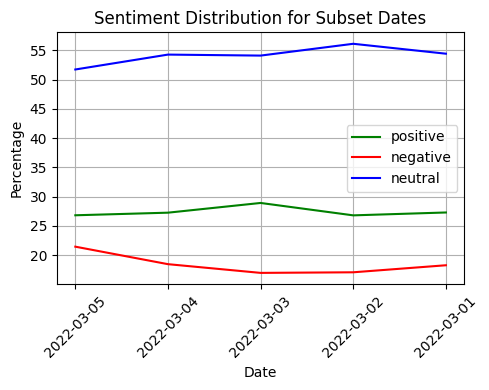

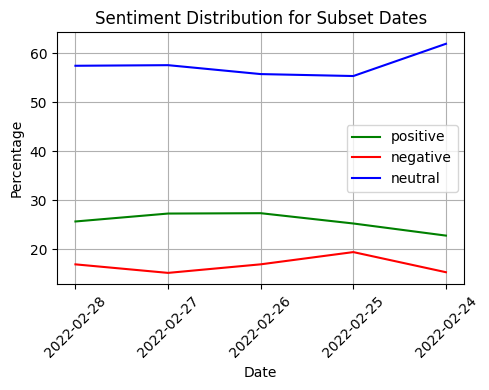

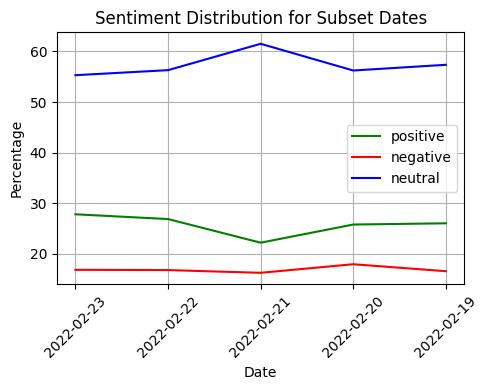

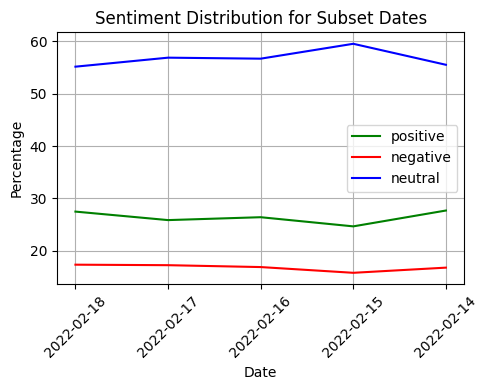

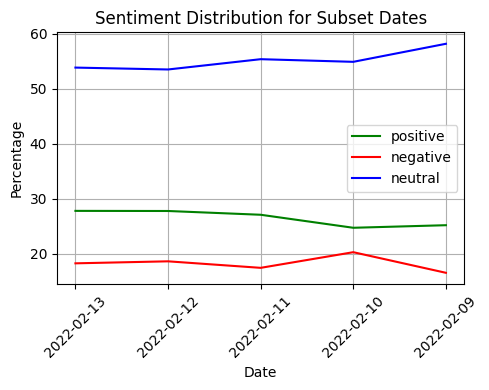

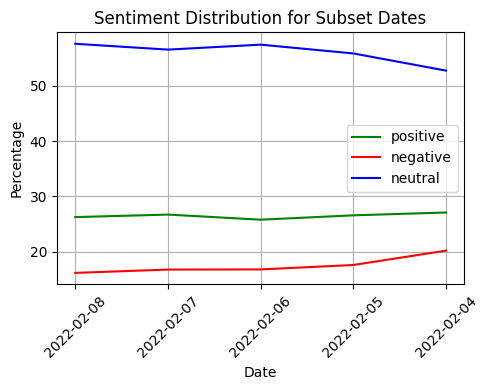

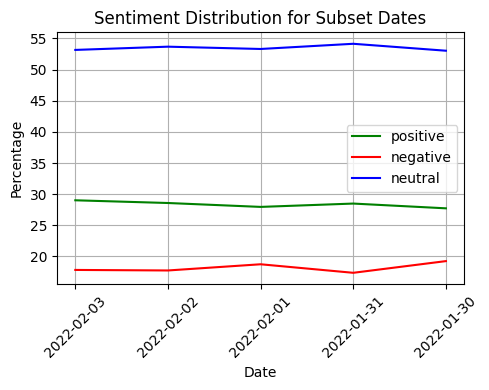

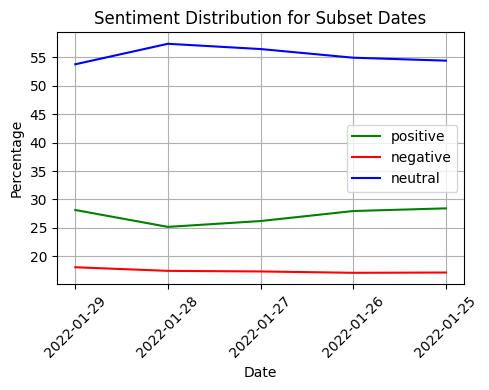

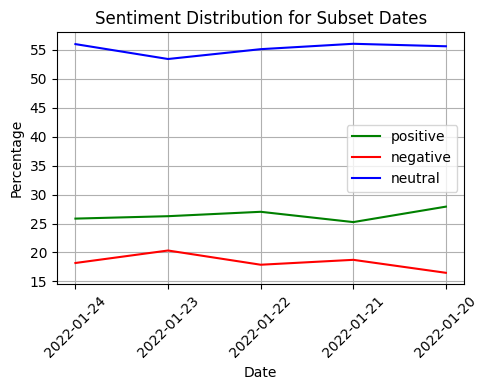

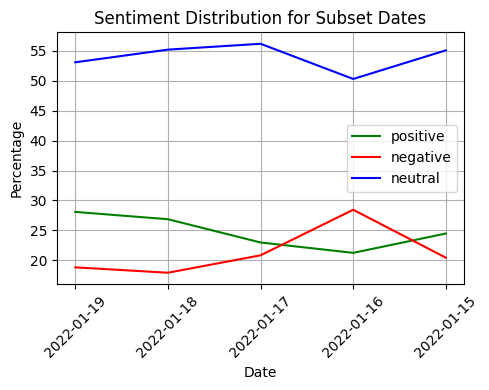

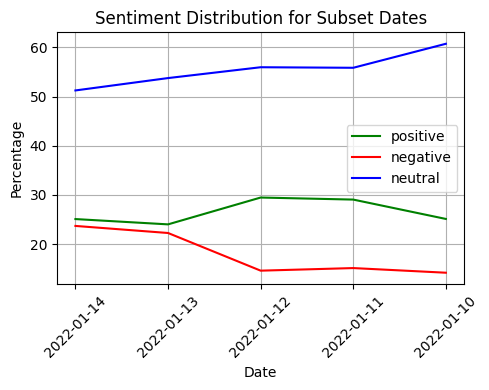

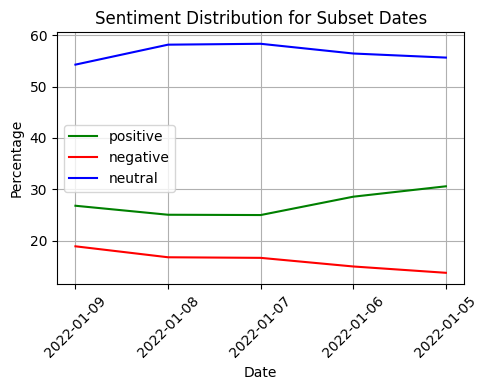

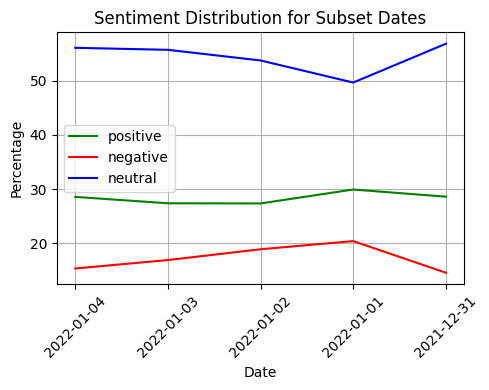

In [17]:
plot_sentiment_over_time_subset(data, subset_size=5)

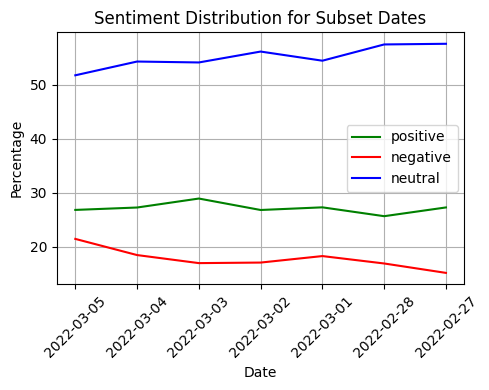

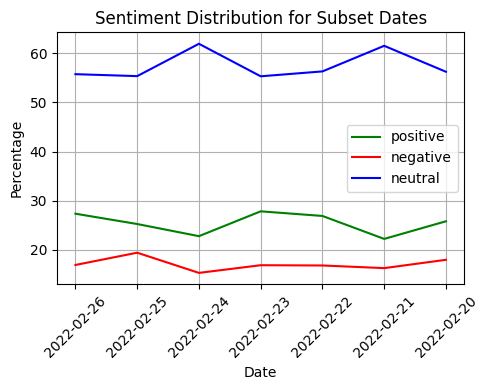

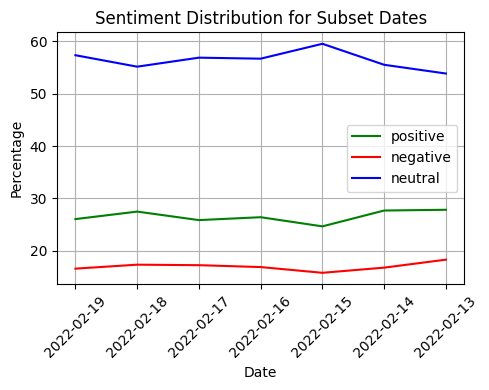

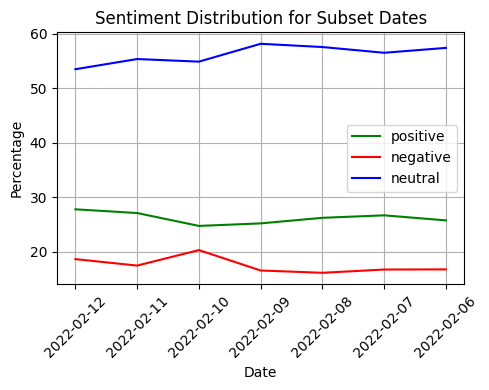

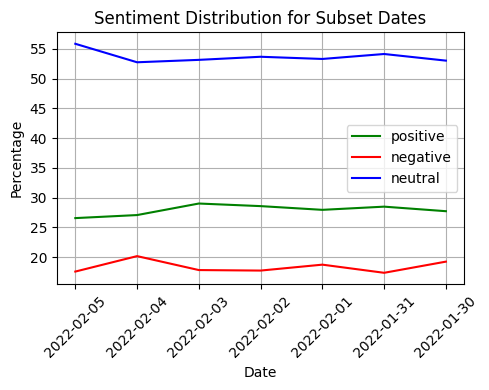

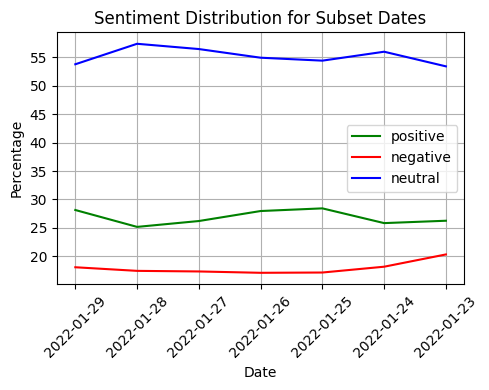

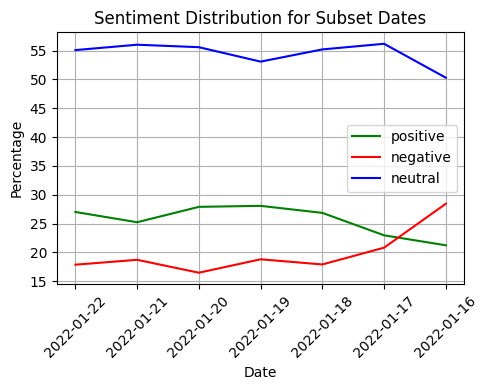

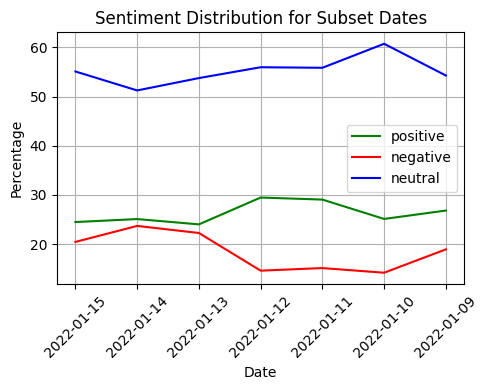

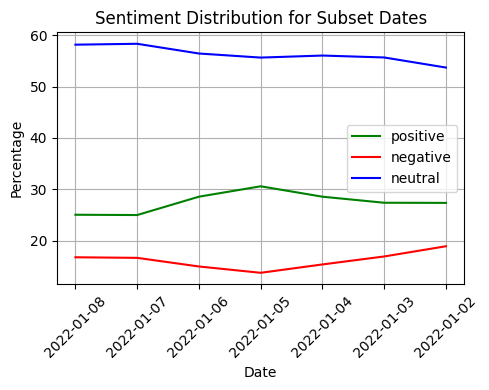

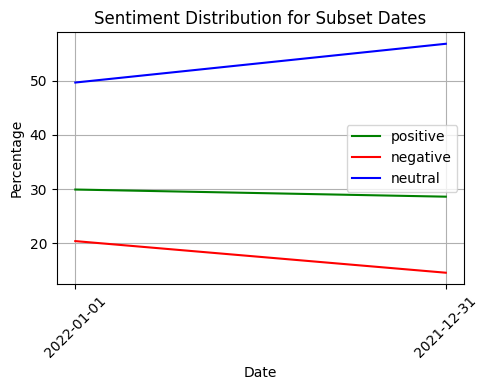

In [18]:
plot_sentiment_over_time_subset(data, subset_size=7)

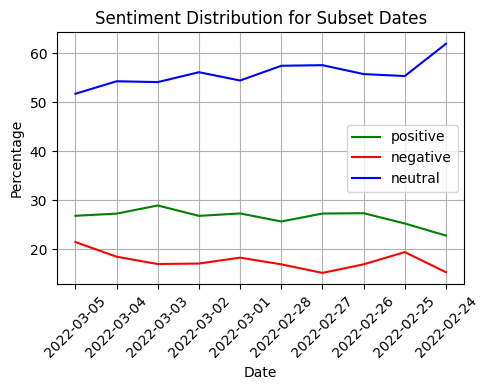

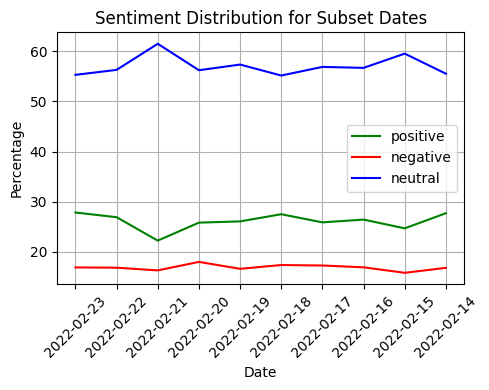

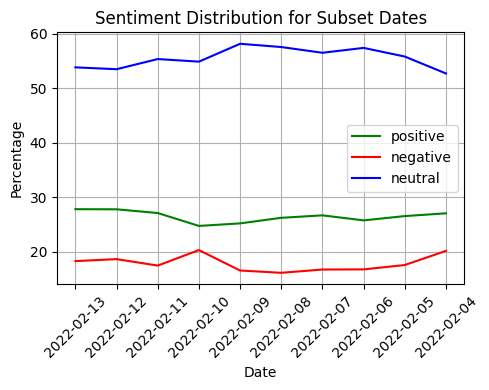

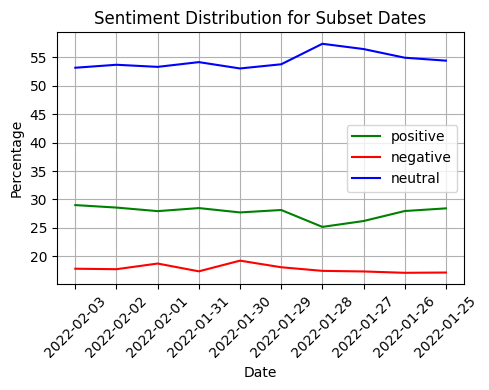

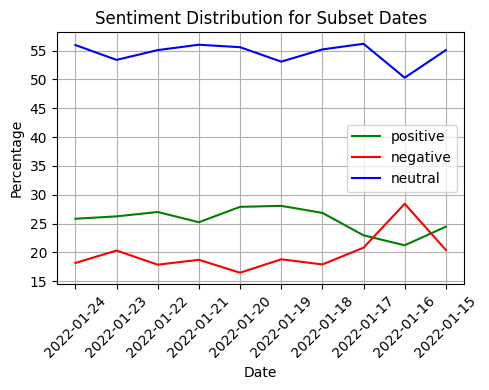

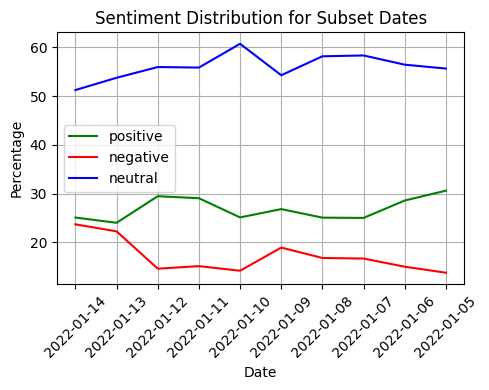

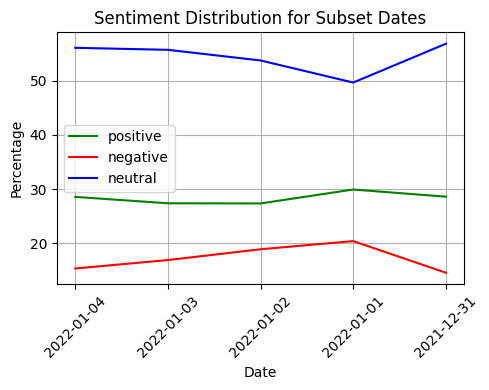

In [19]:
plot_sentiment_over_time_subset(data, subset_size=10)

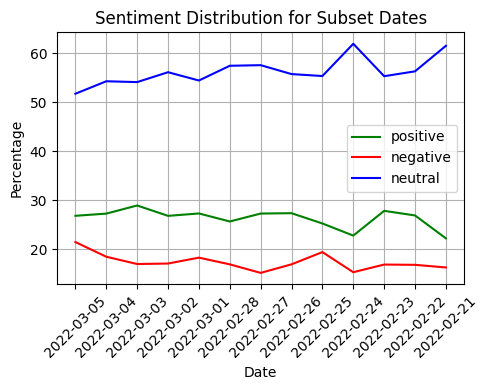

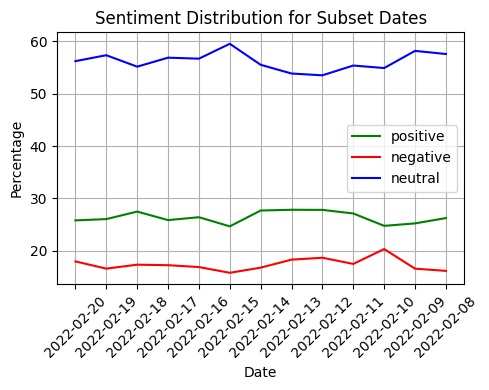

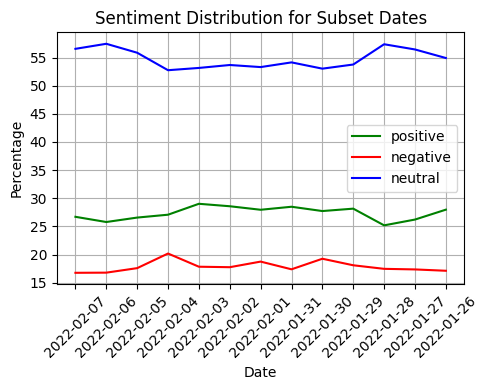

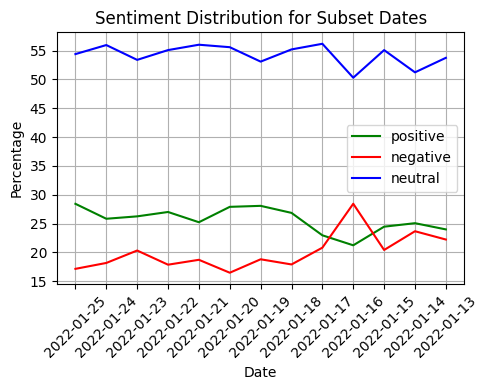

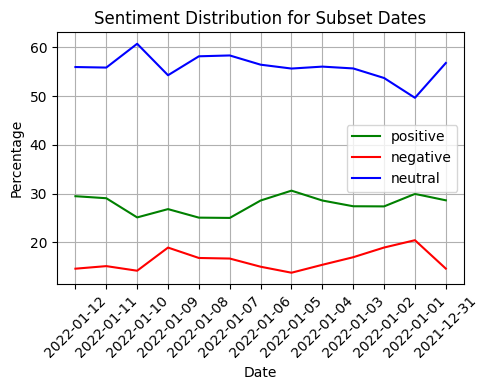

In [20]:
plot_sentiment_over_time_subset(data, subset_size=13)

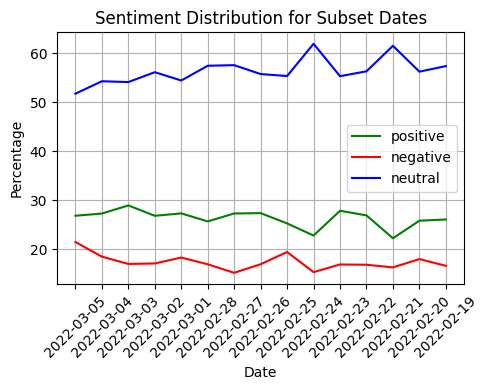

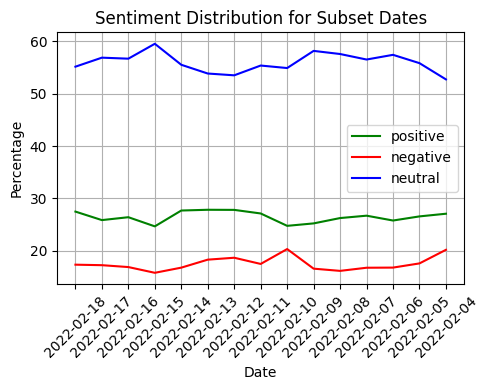

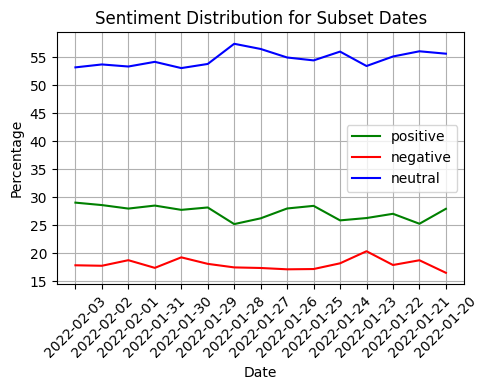

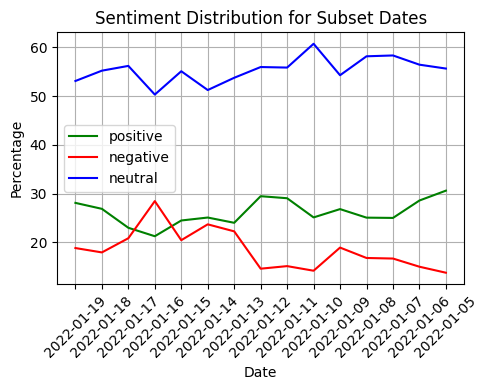

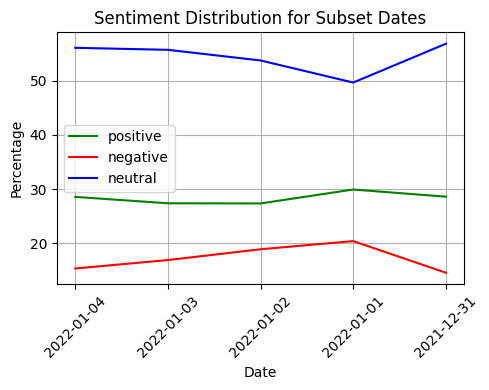

In [25]:
plot_sentiment_over_time_subset(data, subset_size=15)

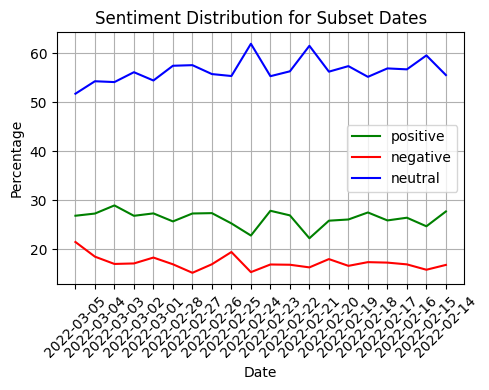

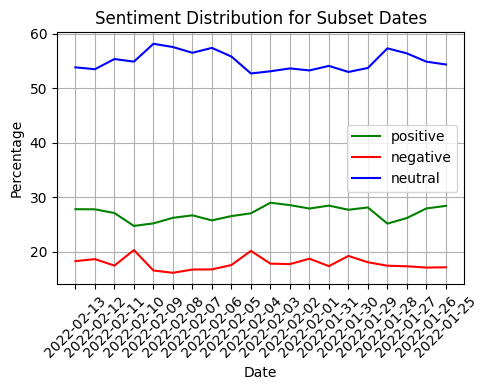

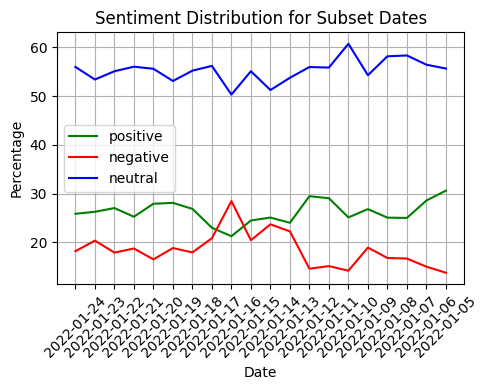

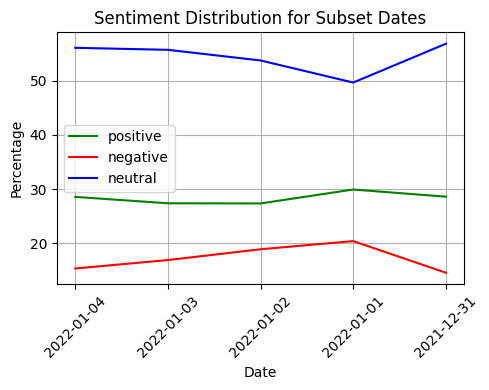

In [26]:
plot_sentiment_over_time_subset(data, subset_size=20)

**Subjectivity Sentiment**

In [21]:
# Define a function to classify subjectivity
def classify_subjectivity(subjectivity):
    if subjectivity > 0.5:
        return 'Subjective'
    else:
        return 'Objective'

# Apply the classification function to the 'subjectivity' column
data['subjectivity_sentiment'] = data['subjectivity'].apply(classify_subjectivity)

# Display the count of tweets in each sentiment category
subjectivity_sentiment_counts = data['subjectivity_sentiment'].value_counts()
print(subjectivity_sentiment_counts)


subjectivity_sentiment
Objective     201170
Subjective     71312
Name: count, dtype: int64


In [22]:
data

,content,date,polarity,subjectivity,sentiment,subjectivity_sentiment
0,is that the same expensive and ineffective bor...,2022-03-05,-0.187500,0.268750,Negative,Objective
1,so the americans are dressing up as russ...,2022-03-05,0.000000,0.000000,Neutral,Objective
2,maybe if one military unit from ukraine crosse...,2022-03-05,-0.050000,0.050000,Neutral,Objective
3,volunteers cross polish border into ukraine to...,2022-03-05,0.000000,0.000000,Neutral,Objective
4,but theres no russian aircraft flying nea...,2022-03-05,0.200000,0.300000,Positive,Objective
...,...,...,...,...,...,...
284659,rusia wants to take back ukraine they are our...,2021-12-31,0.040000,0.260000,Neutral,Objective
284660,a positive for russia is that according to us...,2021-12-31,0.151515,0.530303,Positive,Subjective
284661,resists further invades because already ...,2021-12-31,0.000000,0.500000,Neutral,Objective
284662,i fully support ukraine s sovereignty but...,2021-12-31,-0.700000,0.900000,Negative,Subjective


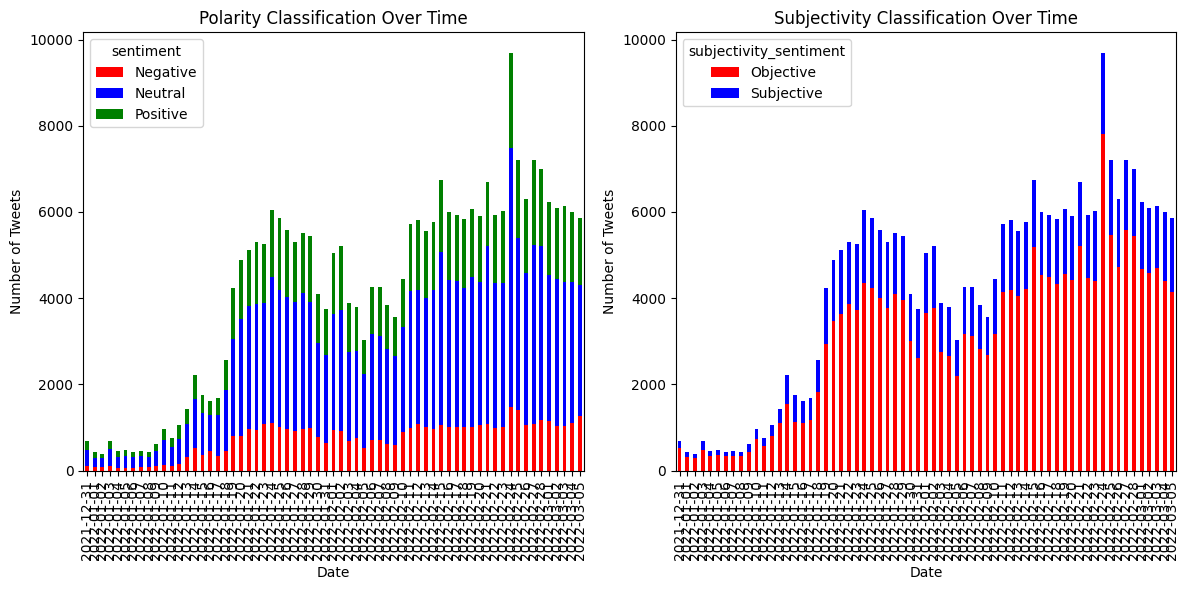

In [26]:
import matplotlib.pyplot as plt

# Group data by polarity class and date
polarity_counts = data.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Group data by subjectivity class and date
subjectivity_counts = data.groupby(['date', 'subjectivity_sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for Polarity
plt.subplot(1, 2, 1)
polarity_counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], ax=plt.gca())
plt.title('Polarity Classification Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Bar chart for Subjectivity
plt.subplot(1, 2, 2)
subjectivity_counts.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=plt.gca())
plt.title('Subjectivity Classification Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

plt.tight_layout()
plt.show()


In [27]:
# Rename the 'sentiment' column to 'polarity_sentiment'
data.rename(columns={'sentiment': 'polarity_sentiment'}, inplace=True)

# Display the DataFrame with the updated column name
data.head()


,content,date,polarity,subjectivity,polarity_sentiment,subjectivity_sentiment
0,is that the same expensive and ineffective bor...,2022-03-05,-0.1875,0.26875,Negative,Objective
1,so the americans are dressing up as russ...,2022-03-05,0.0000,0.00000,Neutral,Objective
2,maybe if one military unit from ukraine crosse...,2022-03-05,-0.0500,0.05000,Neutral,Objective
3,volunteers cross polish border into ukraine to...,2022-03-05,0.0000,0.00000,Neutral,Objective
4,but theres no russian aircraft flying nea...,2022-03-05,0.2000,0.30000,Positive,Objective


In [34]:
sentiment_df = pd.DataFrame()

# Assign values to the columns in the sentiment_df DataFrame
sentiment_df['content'] = data['content']
sentiment_df['polarity'] = data['polarity']
sentiment_df['subjectivity'] = data['subjectivity']

# Classify reviews based on polarity and subjectivity
sentiment_df['polarity_class'] = sentiment_df['polarity'].apply(classify_sentiment)
sentiment_df['subjectivity_class'] = sentiment_df['subjectivity'].apply(classify_subjectivity)

# Display the new classification
print(sentiment_df[['content', 'polarity_class', 'subjectivity_class']])

                                                  content polarity_class  \
0       is that the same expensive and ineffective bor...       Negative   
1             so the americans are dressing up as russ...        Neutral   
2       maybe if one military unit from ukraine crosse...        Neutral   
3       volunteers cross polish border into ukraine to...        Neutral   
4         but    theres no russian aircraft flying nea...       Positive   
...                                                   ...            ...   
284659  rusia wants to take back ukraine  they are our...        Neutral   
284660  a positive for russia is that  according to us...       Positive   
284661      resists  further invades  because already ...        Neutral   
284662      i fully support ukraine s sovereignty  but...       Negative   
284663  biden warns putin   what does acting decisivel...       Negative   

       subjectivity_class  
0               Objective  
1               Objective  
2  

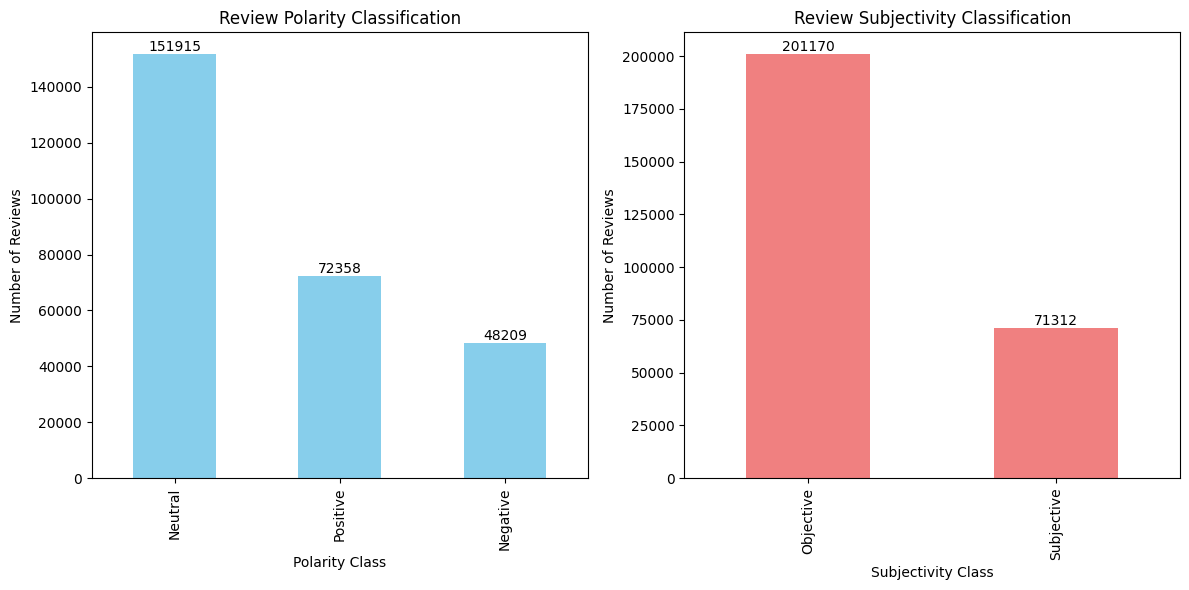

In [35]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for Polarity Classification
plt.subplot(1, 2, 1)
sentiment_df['polarity_class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Review Polarity Classification')
plt.xlabel('Polarity Class')
plt.ylabel('Number of Reviews')

# Add count labels on top of the bars for Polarity
for i, v in enumerate(sentiment_df['polarity_class'].value_counts()):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

# Bar chart for Subjectivity Classification
plt.subplot(1, 2, 2)
sentiment_df['subjectivity_class'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Review Subjectivity Classification')
plt.xlabel('Subjectivity Class')
plt.ylabel('Number of Reviews')

# Add count labels on top of the bars for Subjectivity
for i, v in enumerate(sentiment_df['subjectivity_class'].value_counts()):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


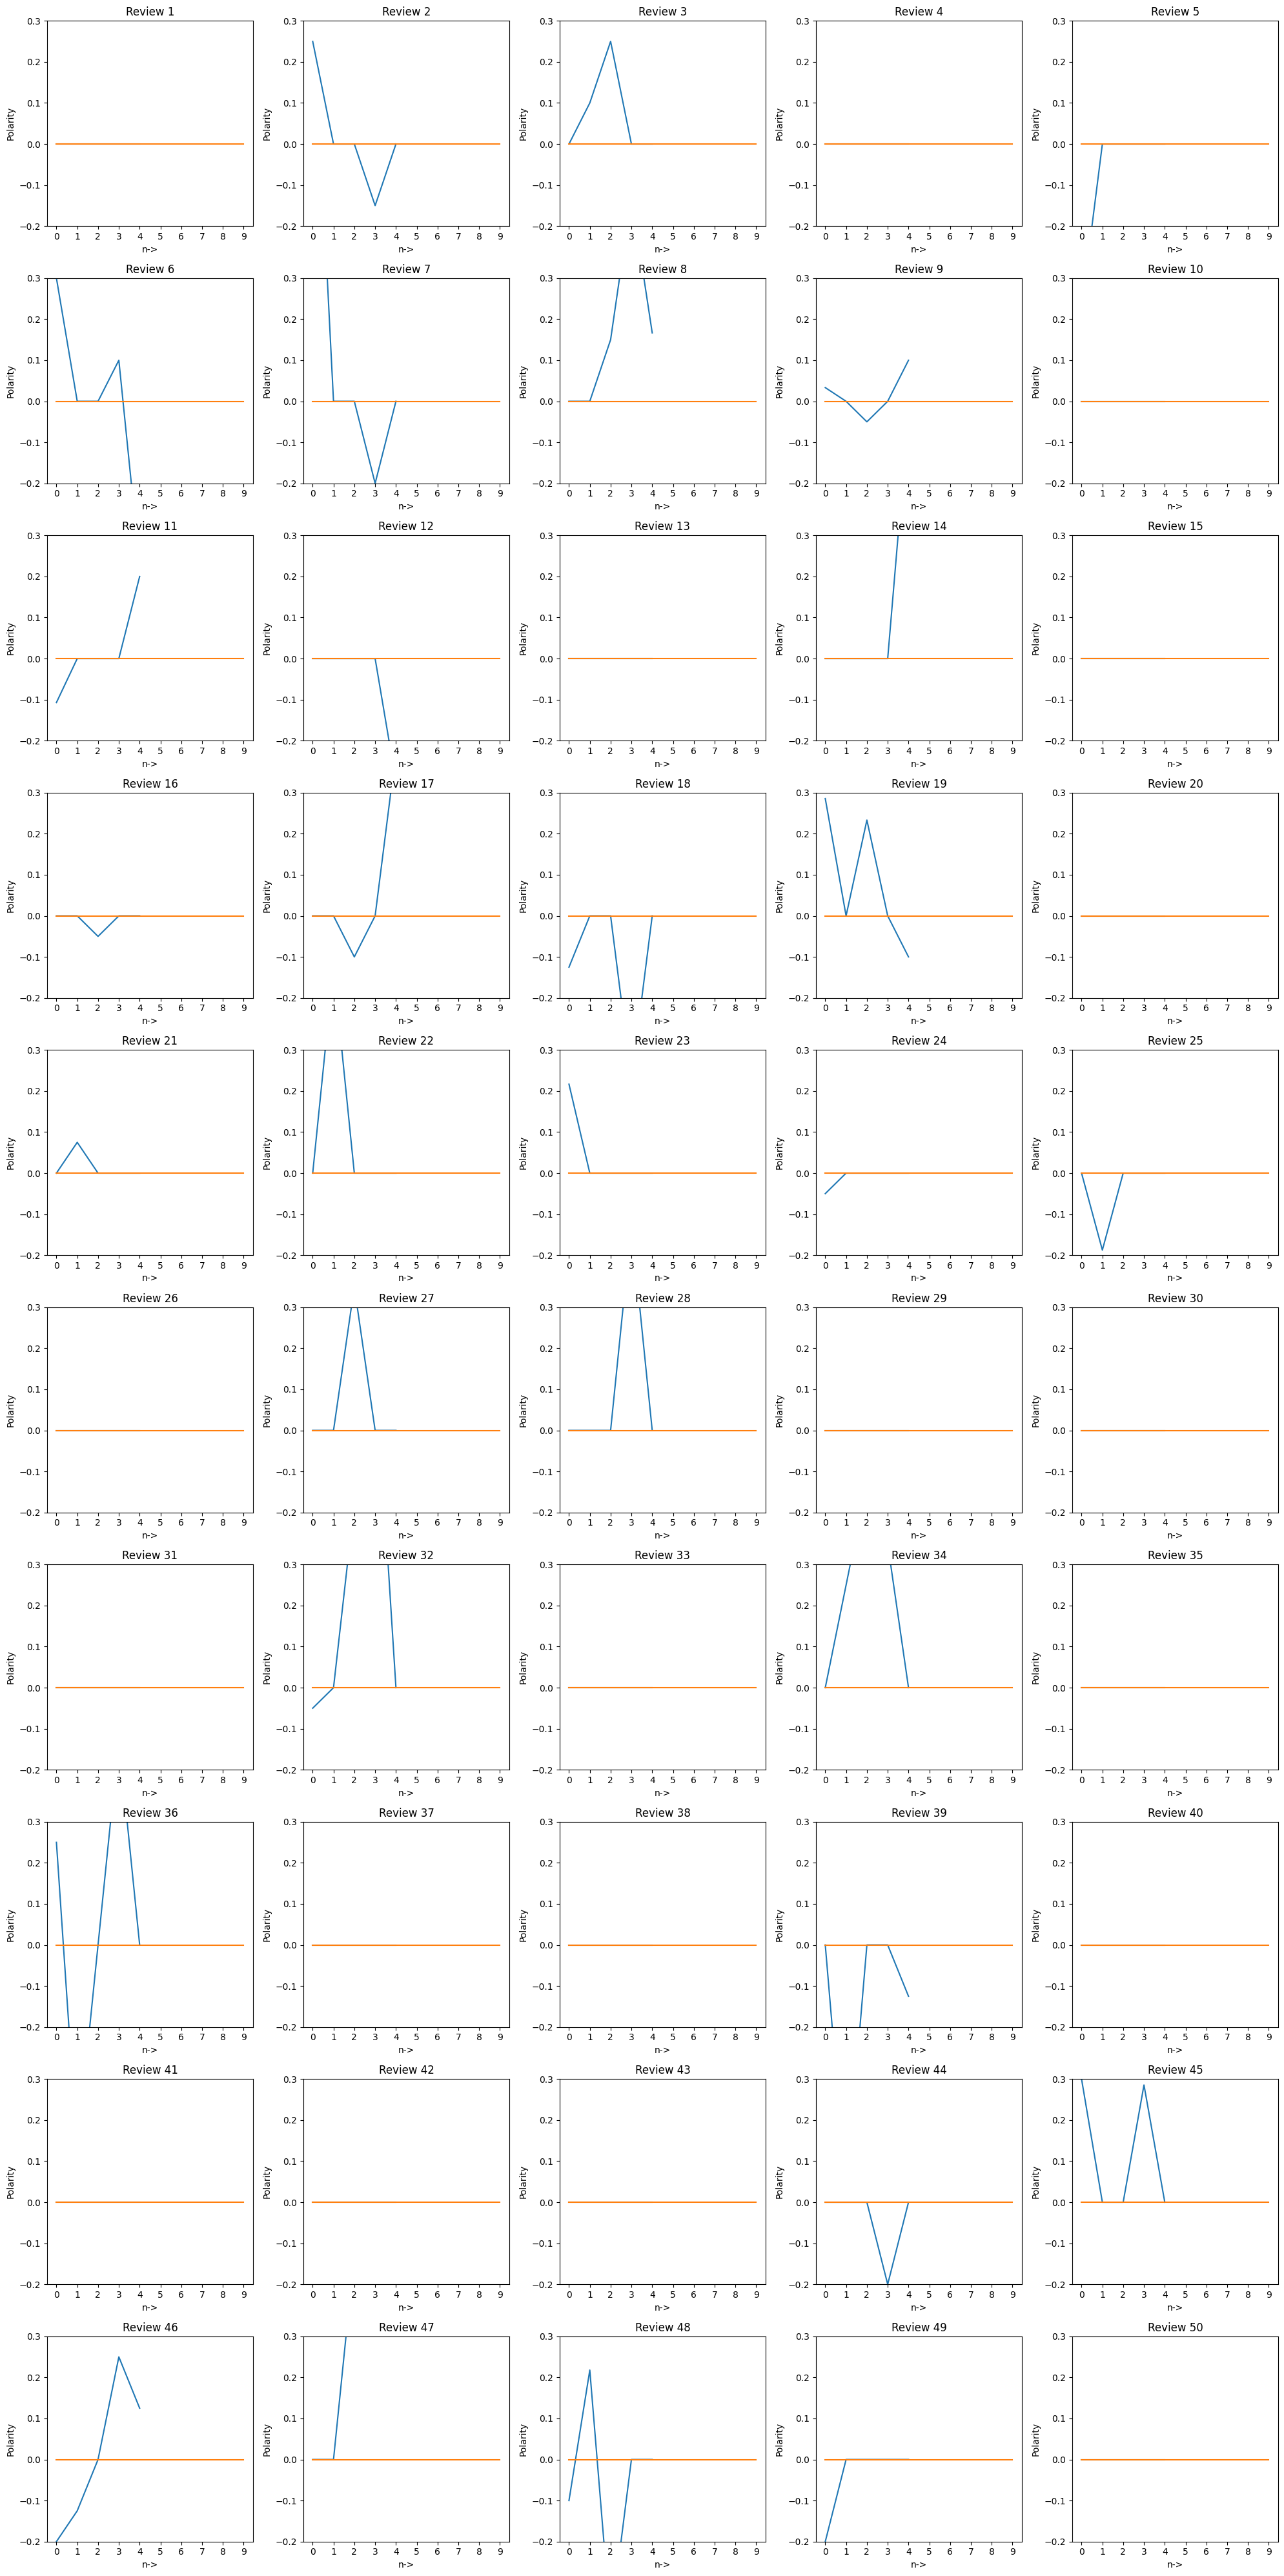

In [50]:
import numpy as np
import math

# Sample a subset of reviews
sampled_reviews = data.sample(n=50)  # Adjust the number of samples as needed

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in sampled_reviews['content']:  # Replace 'content' with the appropriate column name
    split = split_text(t)
    list_pieces.append(split)

# Calculate the polarity for each piece of text
from textblob import TextBlob

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# Determine the layout for subplots
num_samples = len(sampled_reviews)
num_rows = math.ceil(num_samples / 5)

# Show the plot for sampled reviews
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4 * num_rows]

for index, review in enumerate(sampled_reviews.index):
    plt.subplot(num_rows, 5, index+1)  # Adjust the subplot layout based on the number of samples
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(f'Review {index+1}')
    plt.ylim(ymin=-0.2, ymax=0.3)
    plt.ylabel('Polarity')
    plt.xlabel('n->')
    plt.xticks(np.arange(0, 10, 1))

plt.tight_layout()
plt.show()


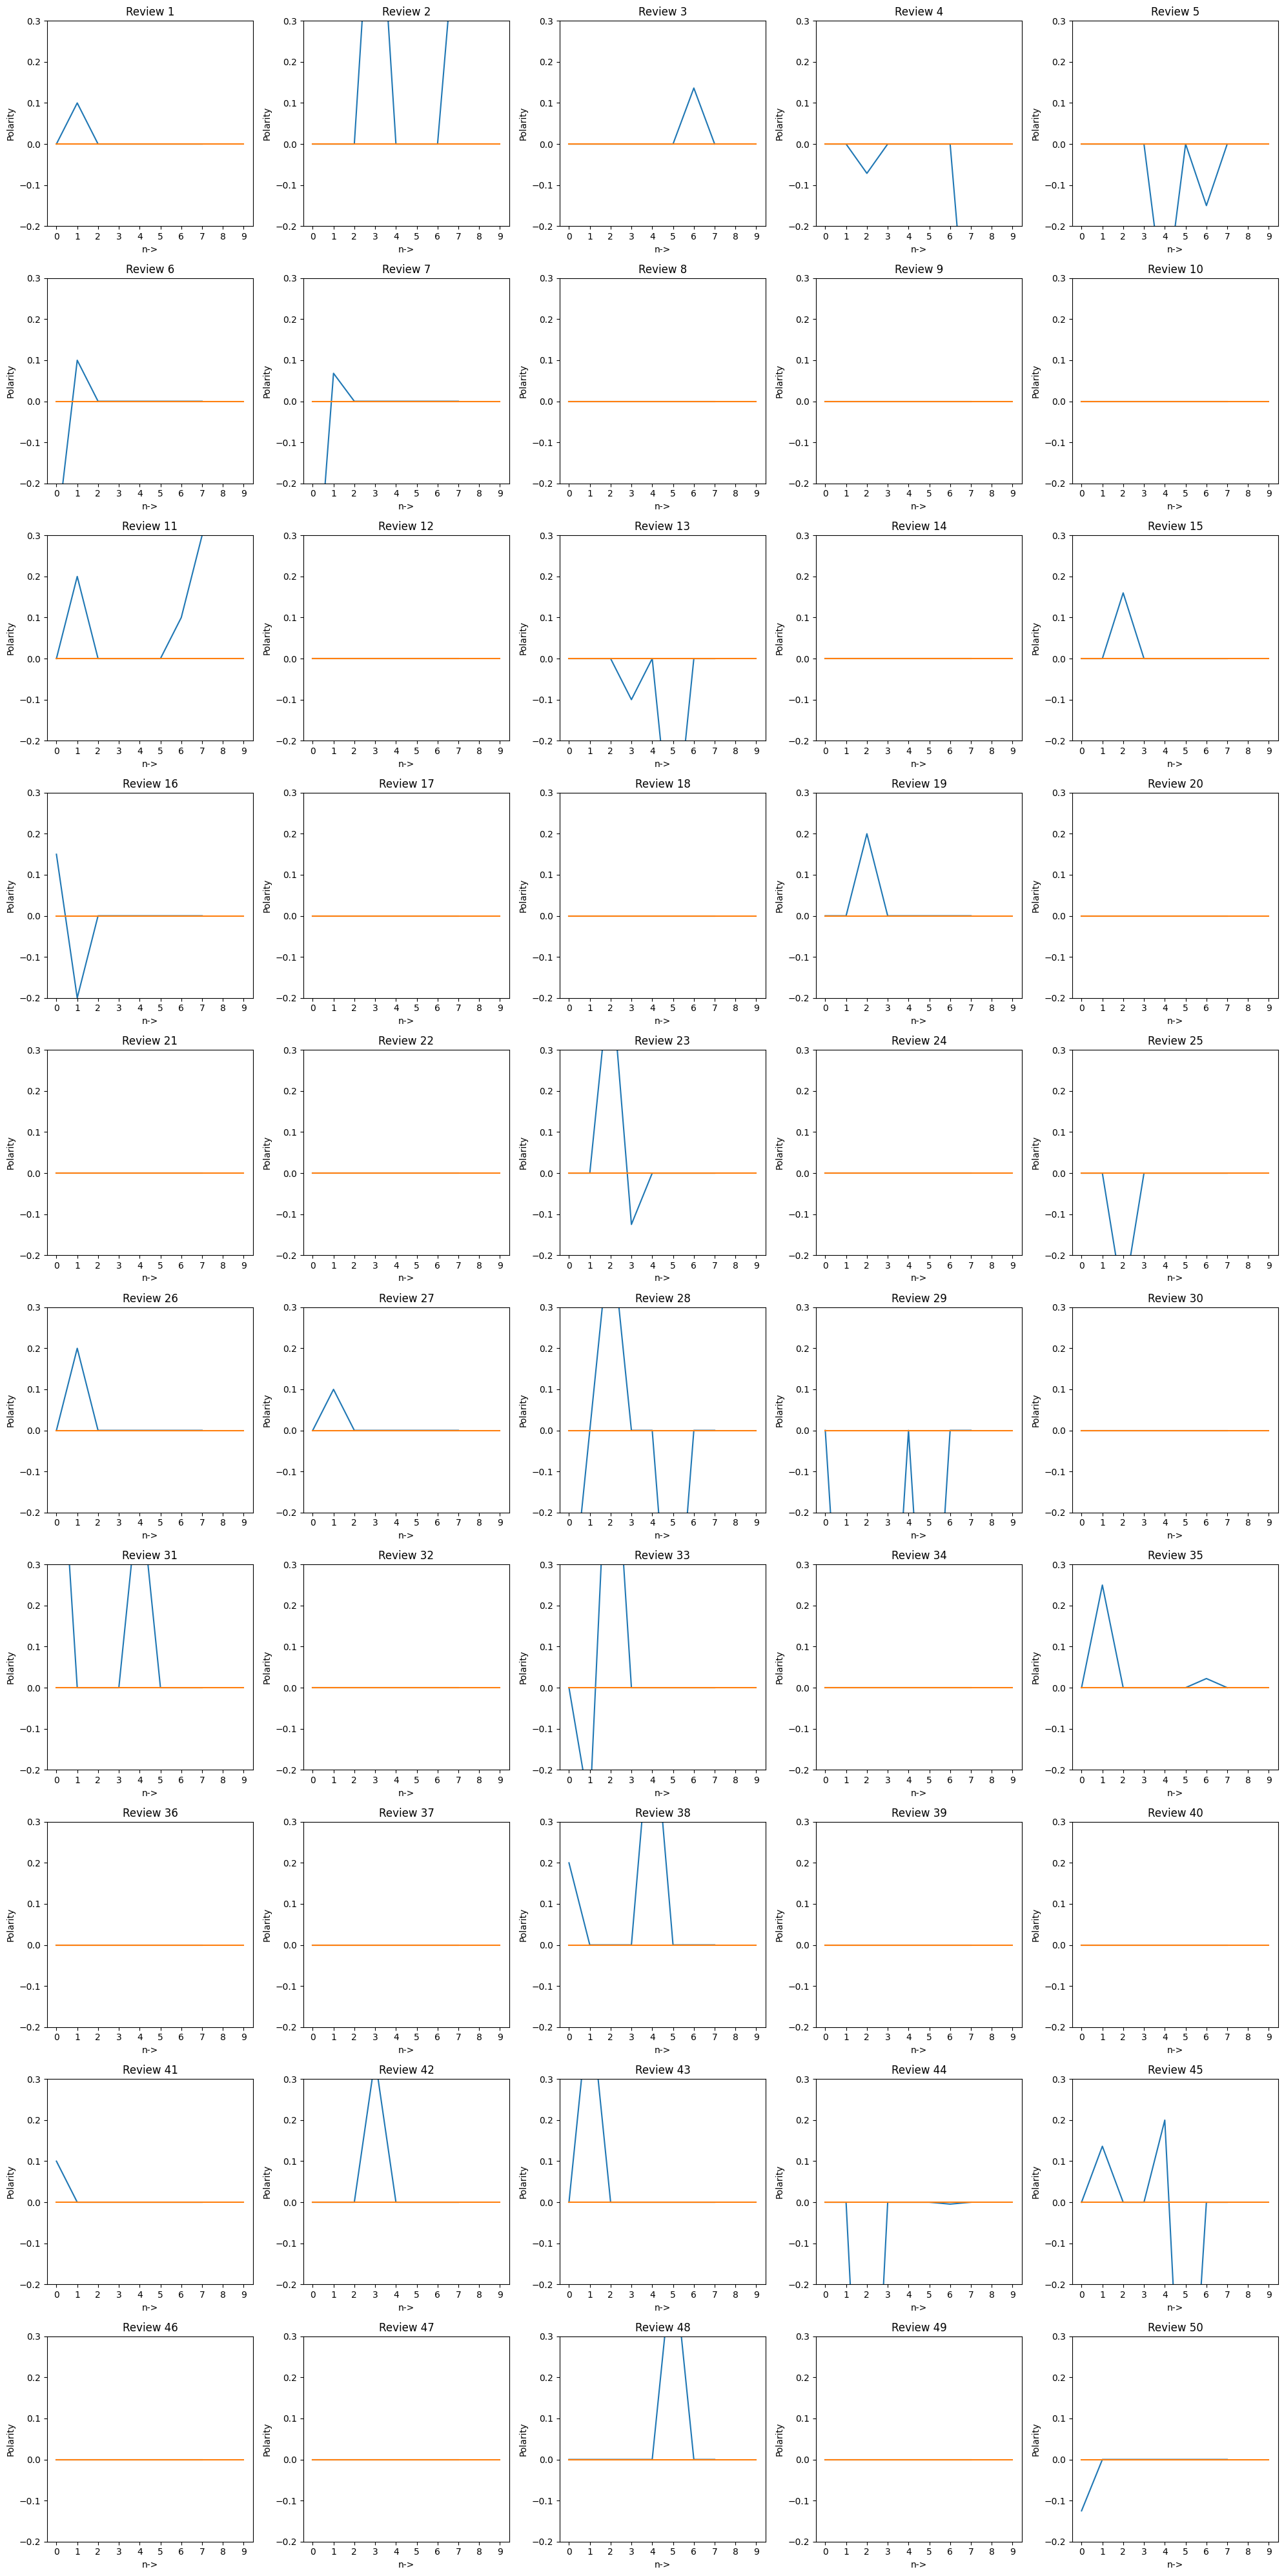

In [51]:
import numpy as np
import math

# Sample a subset of reviews
sampled_reviews = data.sample(n=50)  # Adjust the number of samples as needed

def split_text(text, n=8):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in sampled_reviews['content']:  # Replace 'content' with the appropriate column name
    split = split_text(t)
    list_pieces.append(split)

# Calculate the polarity for each piece of text
from textblob import TextBlob

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# Determine the layout for subplots
num_samples = len(sampled_reviews)
num_rows = math.ceil(num_samples / 5)

# Show the plot for sampled reviews
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4 * num_rows]

for index, review in enumerate(sampled_reviews.index):
    plt.subplot(num_rows, 5, index+1)  # Adjust the subplot layout based on the number of samples
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(f'Review {index+1}')
    plt.ylim(ymin=-0.2, ymax=0.3)
    plt.ylabel('Polarity')
    plt.xlabel('n->')
    plt.xticks(np.arange(0, 10, 1))

plt.tight_layout()
plt.show()


In [52]:
sentiment_df


,content,polarity,subjectivity,polarity_class,subjectivity_class
0,is that the same expensive and ineffective bor...,-0.187500,0.268750,Negative,Objective
1,so the americans are dressing up as russ...,0.000000,0.000000,Neutral,Objective
2,maybe if one military unit from ukraine crosse...,-0.050000,0.050000,Neutral,Objective
3,volunteers cross polish border into ukraine to...,0.000000,0.000000,Neutral,Objective
4,but theres no russian aircraft flying nea...,0.200000,0.300000,Positive,Objective
...,...,...,...,...,...
284659,rusia wants to take back ukraine they are our...,0.040000,0.260000,Neutral,Objective
284660,a positive for russia is that according to us...,0.151515,0.530303,Positive,Subjective
284661,resists further invades because already ...,0.000000,0.500000,Neutral,Objective
284662,i fully support ukraine s sovereignty but...,-0.700000,0.900000,Negative,Subjective


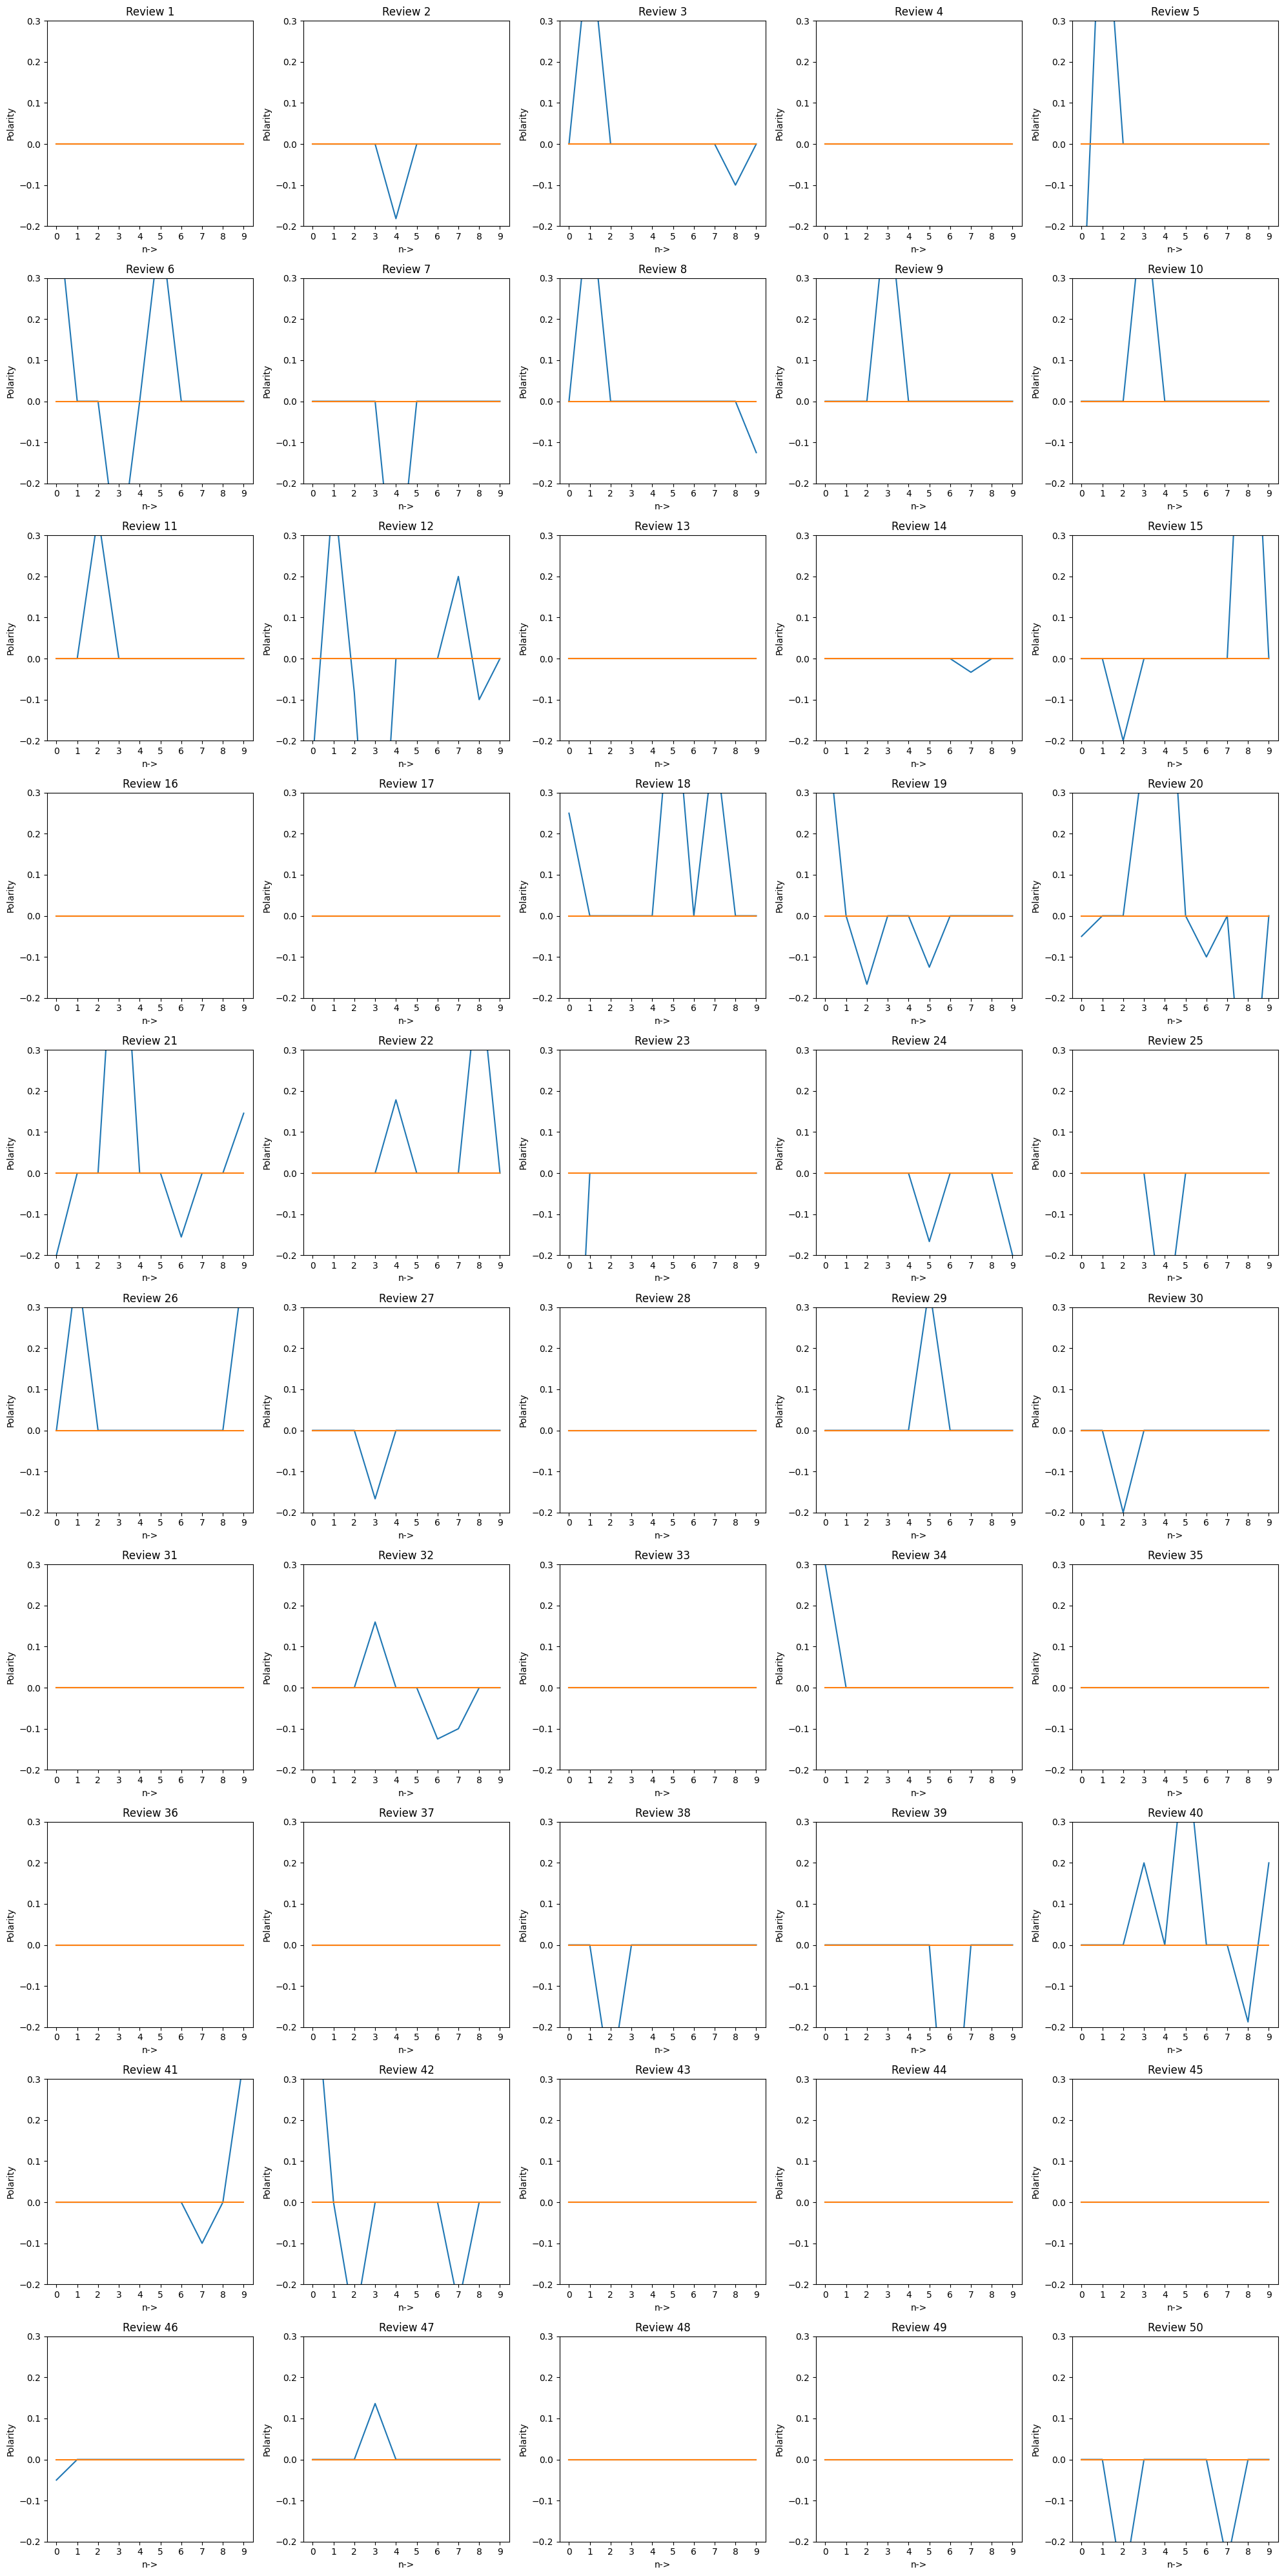

In [54]:
import numpy as np
import math

# Sample a subset of reviews
sampled_reviews = data.sample(n=50)  # Adjust the number of samples as needed

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in sampled_reviews['content']:  # Replace 'content' with the appropriate column name
    split = split_text(t)
    list_pieces.append(split)

# Calculate the polarity for each piece of text
from textblob import TextBlob

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# Determine the layout for subplots
num_samples = len(sampled_reviews)
num_rows = math.ceil(num_samples / 5)

# Show the plot for sampled reviews
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4 * num_rows]

for index, review in enumerate(sampled_reviews.index):
    plt.subplot(num_rows, 5, index+1)  # Adjust the subplot layout based on the number of samples
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(f'Review {index+1}')
    plt.ylim(ymin=-0.2, ymax=0.3)
    plt.ylabel('Polarity')
    plt.xlabel('n->')
    plt.xticks(np.arange(0, 10, 1))

plt.tight_layout()
plt.show()
